# Text Mining and Analysis of Financial Annual Reports

In [13]:
import fitz #pymupdf extraction tool
import re
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoLocator, MultipleLocator
import nltk
from nltk.corpus import stopwords

**NLTK requires a one-time download of stopwords**

In [14]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/george/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Definitions


In [15]:
search_terms = {
"Liquidity": ["liquidity", "funding", "flows", "cash", "liquid reserves", "repo", "haircut", "cashflows", "drawdowns", "outflows", "inflows", "runoff", "crunch", "drain", "buffer", "collateral"],
"Capital": ["capital", "buffers", "capital ratios","capital reserves", "capital requirements", "cushion", "CET1", "Tier 1", "Tier 2", "Tier 3", "capital adequacy", "capital adequacy ratio", "CAR", "capital ratio", "capital position", "capital base", "capital structure", "capital management", "capital planning", "capital allocation", "capital optimization", "capital efficiency", "capital generation", "capital deployment", "capital return", "capital distribution"],
"Credit": ["credit", "loans", "lending", "asset quality", "obligor", "counterparty", "exposures", "net exposure","NPL", "nonperforming", "impairment", "cedants", "default", "credit risk", "credit losses", "credit provisions", "credit reserves", "credit requirements"],
"Foreign Exchange": ["forex", "fx", "currency", "exchange rates","currency pairs", "currency risk", "currency exposure", "currency fluctuations", "currency volatility", "currency hedging", "currency swaps", "currency forwards", "currency options", "currency derivatives", "currency contracts", "currency markets", "currency trading", "currency speculation", "currency manipulation", "currency intervention", "currency peg", "currency basket", "currency band", "currency board", "currency union", "currency crisis", "currency war", "currency controls", "currency devaluation", "currency appreciation", "currency depreciation", "currency revaluation", "currency reserve", "currency swap", "currency peg", "currency basket", "currency band", "currency board", "currency union", "currency crisis", "currency war", "currency controls", "currency devaluation", "currency appreciation", "currency depreciation", "currency revaluation", "currency reserve", "currency swap"],
"Regulatory Risk": ["rules", "regulation", "standard", "compliance", "litigation", "enforcement", "supervision", "regulatory", "regulators",],
"Insurance": ["insurance", "underwriting", "premium", "claims", "lapse", "morbidity", "mortality", "longevity", "catastrophe"],
"Operational Risk": ["operational", "resilience", "cyber", "information", "security", "outsourcing", "third party", "reliance", "continuity", "pandemic", "disaster", "people", "processes", "systems", "data", "technology", "infrastructure", "IT", "fraud", "theft", "error", "disruption", "failure", "malicious", "attack","AI"],
"ESG": ["ESG", "environmental", "social", "governance", "sustainability", "green", "climate", "carbon", "emissions", "pollution", "waste", "biodiversity", "conservation", "renewable", "energy", "solar", "wind", "water", "sustainable", "greenhouse", "emissions", "carbon", "footprint", "greenwashing"],
}

# Text extraction

In [16]:
doc = fitz.open('src/jpm/NYSE_JPM_2022.pdf') #change for document
text = ""
doc = fitz.open(doc)
for page in doc:
    text = text + page.get_text()

# Data Cleaning

In [17]:
# Convert to lowercase
text = text.lower()
# Remove punctuation
text = re.sub(r'[^\w\s]', '', text)
# Remove numbers
text = re.sub(r'\d+', '', text)
# Remove extra whitespace
text = re.sub(r'\s+', ' ', text).strip()
# Remove stopwords
stop_words = set(stopwords.words('english'))
text = ' '.join([word for word in text.split() if word not in stop_words])


In [18]:
results = []

# Search the text for each term
for category, words in search_terms.items():
    for word in words:
        presence = word in text
        frequency = text.count(word)
        results.append([word,category,presence,frequency])

# Create a DataFrame from the results
df = pd.DataFrame(results, columns=["SearchTerm","Category","Presence", "Frequency"])

# Print the DataFrame
print(df)

          SearchTerm   Category  Presence  Frequency
0          liquidity  Liquidity      True        151
1            funding  Liquidity      True        104
2              flows  Liquidity      True         97
3               cash  Liquidity      True        287
4    liquid reserves  Liquidity     False          0
..               ...        ...       ...        ...
171       greenhouse        ESG     False          0
172        emissions        ESG      True          3
173           carbon        ESG      True          8
174        footprint        ESG      True          2
175     greenwashing        ESG     False          0

[176 rows x 4 columns]


# Visualisation

## Setting global rcParams

In [19]:
plt.rcParams['figure.facecolor'] = '#12273F' 
plt.rcParams['axes.facecolor'] = '#12273F'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['font.size'] = 16
plt.rcParams['axes.edgecolor']='#FFFFFF'
plt.rcParams['axes.labelcolor']='#FFFFFF'
plt.rcParams['text.color']='#FFFFFF'
plt.rcParams['xtick.color']='#FFFFFF'
plt.rcParams['ytick.color']='#FFFFFF'

## Categories in order

In [20]:
category_count = df.groupby(['Category'])['Frequency'].sum().to_dict()
for category, frequency in category_count.items():
    print(category, frequency)


Capital 705
Credit 3109
ESG 262
Foreign Exchange 91
Insurance 95
Liquidity 1266
Operational Risk 1041
Regulatory Risk 500


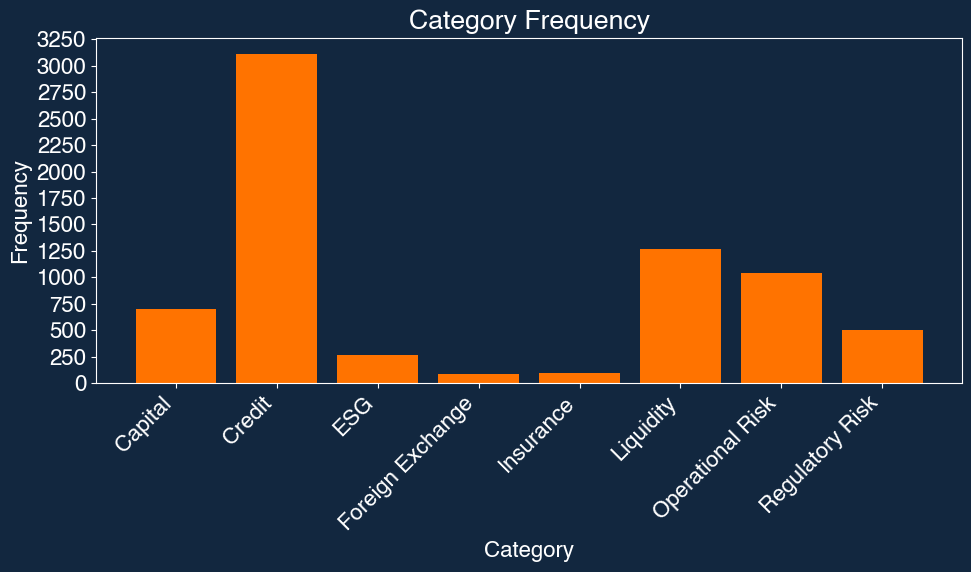

In [23]:
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(x=list(category_count.keys()), height=list(category_count.values()), color='#FF7300')
plt.title('Category Frequency')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_locator(MultipleLocator(250))
plt.tight_layout()
plt.show()


Using terms such as "capital" or "credit" heavily distorts the distribution of this graph and therefore holds little usefulness 

## Individual words

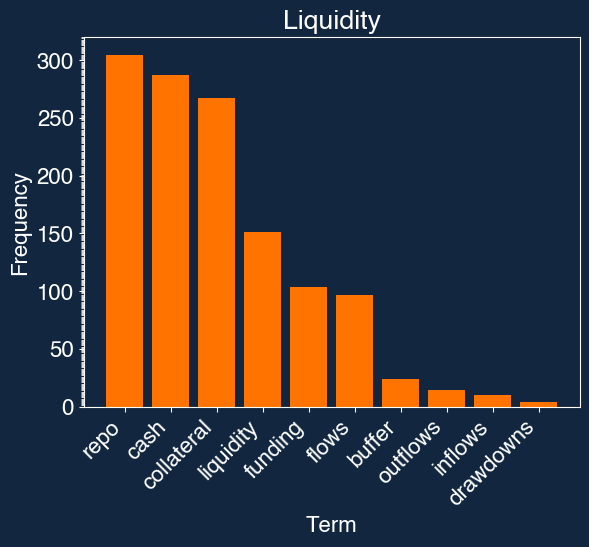

In [22]:

def plot_category(n, category):
    category_df = df[df['Category'] == category]
    category_df = category_df.sort_values(by='Frequency', ascending=False)
    top_words = category_df.iloc[:n]['SearchTerm']
    top_frequencies = category_df.iloc[:n]['Frequency']

    ax = plt.gca()
    ax.set_facecolor('#12273F')

    plt.bar(top_words, top_frequencies, color='#FF7300') 
    plt.title(category)
    plt.xlabel('Term', color='white') #TODO: overwriting rcparams for no reason
    plt.ylabel('Frequency', color='white') 
    plt.xticks(rotation=45, ha='right', color='white') 
    plt.yticks(color='white') 
    plt.title(category, color='white')
    plt.gca().yaxis.set_major_locator(AutoLocator())
    plt.gca().yaxis.set_minor_locator(MultipleLocator(1))
    plt.show()

plot_category(10, 'Liquidity')
